In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from pathlib import Path

%matplotlib inline

The purpose of this notebook is to model fish motion and give an analytical solution based upon Lighthill's Elonged Body Theorem

In [2]:
x = sp.Symbol('x')
t = sp.Symbol('t')
k = 2*sp.pi
w = 2*sp.pi
expr = (0.02 - 0.08*x + 0.16*x**2)*sp.sin(k*x - w*t)
hx = sp.diff(expr, x)
hx2 = hx**2
ht = sp.diff(expr, t)
ht2 = ht**2

In [6]:
array_size = 100
times = np.linspace(0, 1, array_size)
tail_length = 0.05
A_l = np.pi*tail_length**2/4
fish_length = 1.0
lengths = np.ones(array_size)*fish_length
density = 1025
velocity = 1.0

thrust_expr = (density*A_l/2)*(ht2 - velocity*hx2)
f_thrust = sp.lambdify([x, t],thrust_expr, "numpy")

power_expr = density*A_l*velocity*(ht*(ht + velocity*hx))
f_power = sp.lambdify([x, t], power_expr, "numpy")

In [7]:
thrust = f_thrust(lengths, times)
power = f_power(lengths, times)

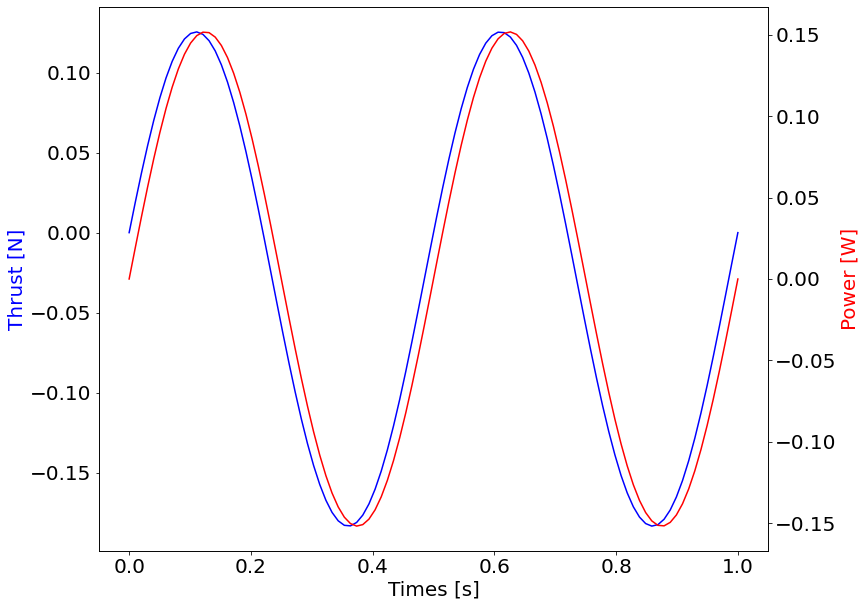

In [8]:
plt.rcParams.update({'font.size':20})

fig1, ax1 = plt.subplots(figsize=(12,10))
p1, = ax1.plot(times, thrust, 'b', label='Lighthill Thrust')

twin1 = ax1.twinx()
p2, = twin1.plot(times, power, 'r', label='Lighthill Power')

ax1.set_xlabel('Times [s]')
ax1.set_ylabel('Thrust [N]')

twin1.set_ylabel('Power [W]')

ax1.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())